# Feature Transformation

Current state of transformations:

- alt: Currently fully transformed via `log(x + 1 - min(x))`. This appears to be acceptable in some circles but doubted in others.
- minimum_lap_time: Normalized by raceId, then used imputation by the median for outliers.
- average_lap_time: Normalized by raceId, then transformed using `log(x)`. Also used imputation by the median for outliers.
- PRCP: Ended up being transformed with `log(x + 1)`. Again, this appears to be acceptable in some circles but doubted in others.

## Set Up

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [4]:
# Read in MasterData5.
master_data_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/processed/MasterData5.csv'
master_data = pd.read_csv(master_data_url, sep = ',', engine = 'python')

In [5]:
# Rename Completion Status to CompletionStatus.
master_data = master_data.rename(columns = {"Completion Status": "CompletionStatus"})

In [6]:
# Only include the final, decided features we'll be using in our models. Do not include identifiable features besides raceId and driverId.
features = master_data[['raceId', 'driverId', 'CompletionStatus', 'alt', 'grid', 'trackType2',
                        'average_lap_time', 'minimum_lap_time',
                        'year', 'PRCP', 'TAVG', 'isHistoric', 'oneHot_circuits_1',
                        'oneHot_circuits_2', 'oneHot_circuits_3', 'oneHot_circuits_4',
                        'oneHot_circuits_5', 'oneHot_circuits_6']]

In [7]:
# Rename trackType2 to trackType.
features = features.rename(columns = {"trackType2": "trackType"})

In [8]:
# Make trackType a string feature instead of numeric.
features["trackType"] = features.trackType.astype("str")

## Transform Features

We know from our `Variable_Distribution.csv` workbook that the features with positive skews that we need to transform are `alt` and `average_lap_time`. Features with outliers are `minimum_lap_time` and `PRCP`.

The site that has the code for using log to transform our features is here: https://towardsdatascience.com/feature-transformation-for-multiple-linear-regression-in-python-8648ddf070b8

### alt

The feature `alt`, or the altitude of each track, is positively skewed. You can see how below.

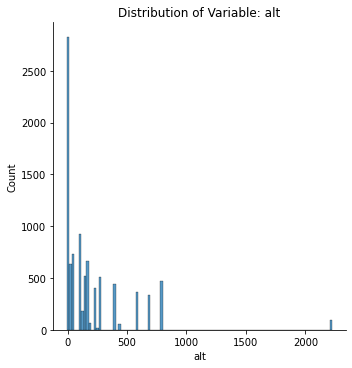

In [9]:
# Show the distribution of alt.
alt_dis = sns.displot(features, x = 'alt').set(title = "Distribution of Variable: alt")

In [10]:
# What does alt look like?
features['alt'].describe()

count    9258.000000
mean      199.431087
std       307.146655
min        -7.000000
25%        10.000000
50%       109.000000
75%       228.000000
max      2227.000000
Name: alt, dtype: float64

In [11]:
"""
Transform alt below using log(x + 1 - min(x)). These were suggested by the following sites:
https://blogs.sas.com/content/iml/2011/04/27/log-transformations-how-to-handle-negative-data-values.html
https://www.researchgate.net/post/can_we_replace-Inf_values_after_log_transformations_with_zero
"""
features['alt_trans'] = np.log(features['alt'] + 1 - min(features['alt']))
features.describe()

,raceId,driverId,CompletionStatus,alt,grid,average_lap_time,minimum_lap_time,year,PRCP,TAVG,isHistoric,oneHot_circuits_1,oneHot_circuits_2,oneHot_circuits_3,oneHot_circuits_4,oneHot_circuits_5,oneHot_circuits_6,alt_trans
count,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000
mean,500.063945,248.870706,0.767768,199.431087,11.042774,97897.008632,90865.612119,2008.737308,0.112807,68.347119,0.296716,0.276302,0.244329,0.191294,0.131562,0.111255,0.045258,4.386664
std,409.166748,355.492035,0.422279,307.146655,6.245172,21055.799600,13720.583129,7.242114,0.392287,8.901002,0.456835,0.447192,0.429712,0.393341,0.338032,0.314465,0.207881,1.497755
min,1.000000,1.000000,0.000000,-7.000000,0.000000,62932.344828,55404.000000,1996.000000,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,15.000000,1.000000,10.000000,6.000000,85066.436479,80839.750000,2002.000000,0.000000,61.975000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.890372
50%,236.000000,35.000000,1.000000,109.000000,11.000000,94647.636739,88988.500000,2009.000000,0.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.762174
75%,934.000000,808.000000,1.000000,228.000000,16.000000,106184.579377,99523.750000,2015.000000,0.040000,75.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.463832
max,1060.000000,854.000000,1.000000,2227.000000,24.000000,753493.000000,446036.000000,2021.000000,6.300000,94.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.711997


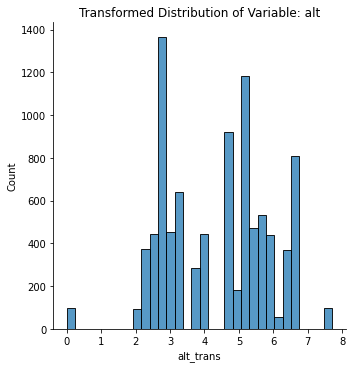

In [12]:
# Show the new distribution of alt.
alt_trans_dis = sns.displot(features, x = 'alt_trans').set(title = "Transformed Distribution of Variable: alt")

`alt` is still not exactly a normal distribution, but it is no longer skewed. This should help it perform better in our models.

### minimum_lap_time

Before we can deal with any outliers, we need to normalize the feature. Right now `minimum_lap_time` is not normalized across races, which is a problem because different races have different track lengths. In order to normalize this feature, we'll group by `raceId`, aggregate for the mean, and then join this new variable back up with our master data. From there we can find `normalized_minlaptime = minimum_lap_time / mean_minlaptime`.

In [13]:
# Group by raceId and aggregate for the mean.
raceId_min = master_data.groupby(['raceId'], as_index = False).agg({'minimum_lap_time':'mean'})
raceId_min.describe()

,raceId,minimum_lap_time
count,463.000000,463.000000
mean,496.749460,90761.895806
std,412.043264,11989.124726
min,1.000000,57122.666667
25%,116.500000,81305.572727
50%,232.000000,89271.600000
75%,938.500000,99276.956140
max,1060.000000,129836.666667


In [14]:
# Rename raceId_average's average_lap_time to mean_avglaptime.
raceId_min = raceId_min.rename(columns = {"minimum_lap_time": "mean_minlaptime"})

In [15]:
# Merge master_data with raceId_average by "raceId" to get avglaps_avg.
avglaps_min = pd.merge(master_data, raceId_min, on = "raceId")
avglaps_min.head()

,raceId,driverId,constructorId,grid,familyStatus,CompletionStatus,year,circuitId,country,alt,...,TMAX,TMIN,oneHot_circuits_1,oneHot_circuits_2,oneHot_circuits_3,oneHot_circuits_4,oneHot_circuits_5,oneHot_circuits_6,trackType2,mean_minlaptime
0,1,2,2,9,4,1,2009,1,Australia,10,...,78.0,66.0,0,1,0,0,0,0,1,88804.058824
1,1,3,3,5,4,1,2009,1,Australia,10,...,78.0,66.0,0,1,0,0,0,0,1,88804.058824
2,1,4,4,10,4,1,2009,1,Australia,10,...,78.0,66.0,0,1,0,0,0,0,1,88804.058824
3,1,6,3,11,1,0,2009,1,Australia,10,...,78.0,66.0,0,1,0,0,0,0,1,88804.058824
4,1,7,5,17,4,1,2009,1,Australia,10,...,78.0,66.0,0,1,0,0,0,0,1,88804.058824


In [16]:
# Normalize the average lap time by dividing average_lap_time by mean_avglaptime.
avglaps_min['normalized_minLapTime'] = avglaps_min['minimum_lap_time'] / avglaps_min['mean_minlaptime']
avglaps_min[['normalized_minLapTime', 'minimum_lap_time', 'mean_minlaptime']].describe()

,normalized_minLapTime,minimum_lap_time,mean_minlaptime
count,9258.000000,9258.000000,9258.000000
mean,1.000000,90865.612119,90865.612119
std,0.072445,13720.583129,11918.692456
min,0.768296,55404.000000,57122.666667
25%,0.984717,80839.750000,81417.050000
50%,0.995628,88988.500000,89395.000000
75%,1.006281,99523.750000,99528.111111
max,4.837281,446036.000000,129836.666667


Now that we have minimum lap time normalized, let's take a look at the distribution again. From the description above, with a large gap between the 75% quartile and the max, it looks like the data will still be skewed.

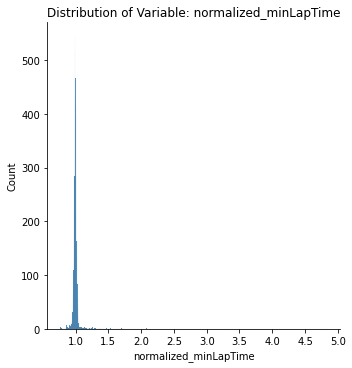

In [17]:
# Plot the distribution of our new variable.
norm_minlaptime_dist = sns.displot(avglaps_min, x = 'normalized_minLapTime').set(title = "Distribution of Variable: normalized_minLapTime")

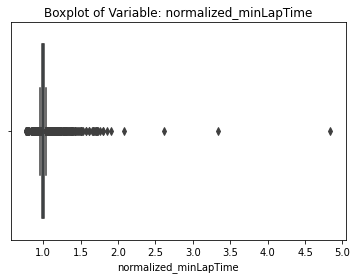

In [18]:
# Plot a boxplot to find our outliers.
normmin_boxplt = sns.boxplot(data = avglaps_min, x = 'normalized_minLapTime').set(title = "Boxplot of Variable: normalized_minLapTime")

We have one significant outlier by 5.0, and three around the 2.0 to 3.5 range.

We'll go ahead and use imputation to deal with these outliers, as per this site (https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8). We're essentially replacing our outliers' values with the medians. As Analytics Vidhya states, "median is appropriate because it is not affected by outliers." We also used Analytics Vidhya's code.

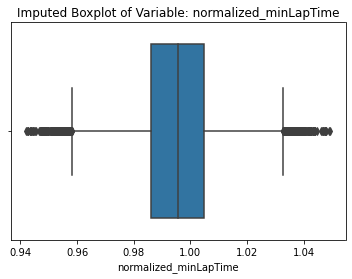

In [19]:
"""
Use Analytics Vidhya's code to create an if statement within a for loop to replace outliers above the
uppertail or below the lowertail with the median. Although Analytics Vidhya used 1.5 as their modifier,
we'll use 2.0 in order to try and collect less outliers while still allowing the distribution to normalize.
"""
for i in avglaps_min['normalized_minLapTime']:
    Q1 = avglaps_min['normalized_minLapTime'].quantile(0.25)
    Q3 = avglaps_min['normalized_minLapTime'].quantile(0.75)
    IQR = Q3 - Q1
    lowertail = Q1 - 2.0 * IQR
    uppertail = Q3 + 2.0 * IQR
    if i > uppertail or i < lowertail:
        avglaps_min['normalized_minLapTime'] = avglaps_min['normalized_minLapTime'].replace(i, np.median(avglaps_min['normalized_minLapTime']))

# Plot a boxplot to find our outliers.
impnormmin_boxplt = sns.boxplot(data = avglaps_min, x = 'normalized_minLapTime').set(title = "Imputed Boxplot of Variable: normalized_minLapTime")

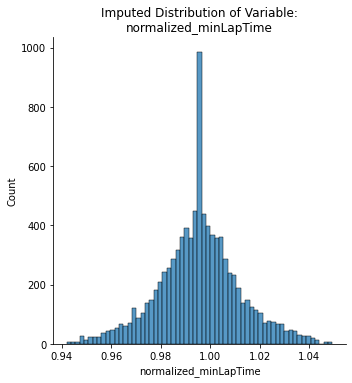

In [32]:
# Plot the new distribution of our new variable.
newnorm_minlaptime_dist = sns.displot(avglaps_min, x = 'normalized_minLapTime').set(title = "Imputed Distribution of Variable:\nnormalized_minLapTime")

We have a normalized feature with what appears to be a normal distribution! The one thing to worry about here is that there were so many outliers that had to be imputated, and that may cause a problem with our distribution.

### average_lap_time

Right now our `average_lap_time` is not normalized across races, which is a problem because different races have different track lengths. In order to normalize this feature, we'll group by `raceId`, aggregate for the mean, and then join this new variable back up with our master data. From there we can find `normalized_avglaptime = average_lap_time / mean_avglaptime`.

In [21]:
# Group by raceId and aggregate for the mean.
raceId_average = master_data.groupby(['raceId'], as_index = False).agg({'average_lap_time':'mean'})
raceId_average.describe()

,raceId,average_lap_time
count,463.000000,463.000000
mean,496.749460,97778.670632
std,412.043264,17734.201342
min,1.000000,63148.468096
25%,116.500000,85815.221432
50%,232.000000,95050.771697
75%,938.500000,106413.463143
max,1060.000000,223015.649842


In [22]:
# Rename raceId_average's average_lap_time to mean_avglaptime.
raceId_average = raceId_average.rename(columns = {"average_lap_time": "mean_avglaptime"})

In [23]:
# Merge master_data with raceId_average by "raceId" to get avglaps_avg.
avglaps_avg = pd.merge(master_data, raceId_average, on = "raceId")
avglaps_avg.head()

,raceId,driverId,constructorId,grid,familyStatus,CompletionStatus,year,circuitId,country,alt,...,TMAX,TMIN,oneHot_circuits_1,oneHot_circuits_2,oneHot_circuits_3,oneHot_circuits_4,oneHot_circuits_5,oneHot_circuits_6,trackType2,mean_avglaptime
0,1,2,2,9,4,1,2009,1,Australia,10,...,78.0,66.0,0,1,0,0,0,0,1,97347.282528
1,1,3,3,5,4,1,2009,1,Australia,10,...,78.0,66.0,0,1,0,0,0,0,1,97347.282528
2,1,4,4,10,4,1,2009,1,Australia,10,...,78.0,66.0,0,1,0,0,0,0,1,97347.282528
3,1,6,3,11,1,0,2009,1,Australia,10,...,78.0,66.0,0,1,0,0,0,0,1,97347.282528
4,1,7,5,17,4,1,2009,1,Australia,10,...,78.0,66.0,0,1,0,0,0,0,1,97347.282528


In [24]:
# Normalize the average lap time by dividing average_lap_time by mean_avglaptime.
avglaps_avg['normalized_avgLapTime'] = avglaps_avg['average_lap_time'] / avglaps_avg['mean_avglaptime']
avglaps_avg[['normalized_avgLapTime', 'average_lap_time', 'mean_avglaptime']].describe()

,normalized_avgLapTime,average_lap_time,mean_avglaptime
count,9258.000000,9258.000000,9258.000000
mean,1.000000,97897.008632,97897.008632
std,0.089293,21055.799600,17949.495608
min,0.523032,62932.344828,63148.468096
25%,0.980882,85066.436479,85826.473799
50%,0.994055,94647.636739,95050.771697
75%,1.006712,106184.579377,106396.044715
max,4.702234,753493.000000,223015.649842


Now that we have average lap time normalized, let's take a look at the distribution again. From the description above, with a large gap between the 75% quartile and the max, it looks like the data will still be skewed.

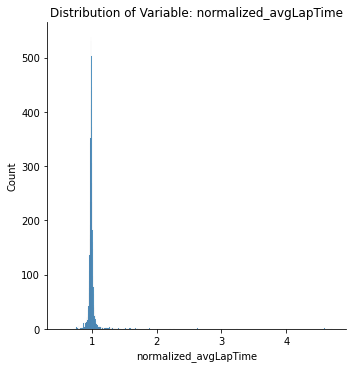

In [25]:
# Plot the distribution of our new variable.
normalized_avglaptime_dist = sns.displot(avglaps_avg, x = 'normalized_avgLapTime').set(title = "Distribution of Variable: normalized_avgLapTime")

We can see that there appears to be a positive skew, so we'll use log(x) to transform the feature.

In [26]:
"""
Transform normalized_avgLapTime with log(x). This was suggested by Towards Data Science, linked above.
"""
avglaps_avg['normalized_avgLapTime'] = np.log(avglaps_avg['normalized_avgLapTime'])
avglaps_avg.describe()

,raceId,driverId,constructorId,grid,familyStatus,CompletionStatus,year,circuitId,alt,isHistoric,...,TMIN,oneHot_circuits_1,oneHot_circuits_2,oneHot_circuits_3,oneHot_circuits_4,oneHot_circuits_5,oneHot_circuits_6,trackType2,mean_avglaptime,normalized_avgLapTime
count,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,...,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000
mean,500.063945,248.870706,36.433787,11.042774,4.095161,0.767768,2008.737308,16.664290,199.431087,0.296716,...,59.706443,0.276302,0.244329,0.191294,0.131562,0.111255,0.045258,0.236336,97897.008632,-0.002371
std,409.166748,355.492035,63.620080,6.245172,1.069234,0.422279,7.242114,17.171166,307.146655,0.456835,...,9.352917,0.447192,0.429712,0.393341,0.338032,0.314465,0.207881,0.424854,17949.495608,0.062665
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1996.000000,1.000000,-7.000000,0.000000,...,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63148.468096,-0.648113
25%,120.000000,15.000000,4.000000,6.000000,4.000000,1.000000,2002.000000,6.000000,10.000000,0.000000,...,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85826.473799,-0.019303
50%,236.000000,35.000000,9.000000,11.000000,4.000000,1.000000,2009.000000,13.000000,109.000000,0.000000,...,59.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95050.771697,-0.005963
75%,934.000000,808.000000,20.000000,16.000000,4.000000,1.000000,2015.000000,20.000000,228.000000,1.000000,...,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106396.044715,0.006690
max,1060.000000,854.000000,214.000000,24.000000,6.000000,1.000000,2021.000000,76.000000,2227.000000,1.000000,...,88.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,223015.649842,1.548038


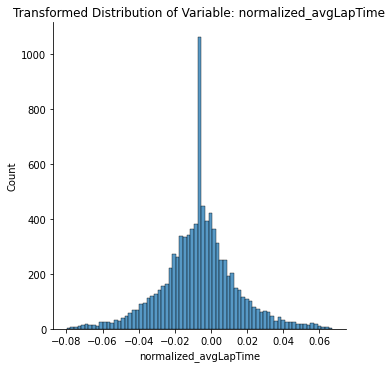

In [33]:
# Plot the distribution of our transformed variable.
normalized_avglaptime_dist = sns.displot(avglaps_avg, x = 'normalized_avgLapTime').set(title = "Transformed Distribution of Variable: normalized_avgLapTime")

This looks much better, but we can see that there are still some extreme outliers.

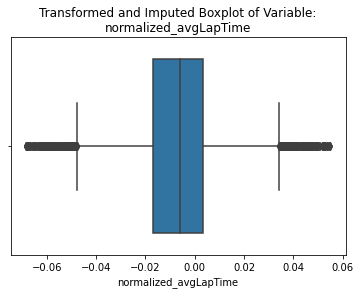

In [35]:
"""
Use Analytics Vidhya's code to create an if statement within a for loop to replace outliers above the
uppertail or below the lowertail with the median. We'll use 2.5 as our modifier to try and collect less
outliers while still allowing the distribution to normalize.
"""
for i in avglaps_avg['normalized_avgLapTime']:
    Q1 = avglaps_avg['normalized_avgLapTime'].quantile(0.25)
    Q3 = avglaps_avg['normalized_avgLapTime'].quantile(0.75)
    IQR = Q3 - Q1
    lowertail = Q1 - 2.5 * IQR
    uppertail = Q3 + 2.5 * IQR
    if i > uppertail or i < lowertail:
        avglaps_avg['normalized_avgLapTime'] = avglaps_avg['normalized_avgLapTime'].replace(i, np.median(avglaps_avg['normalized_avgLapTime']))

# Plot a boxplot to find our outliers.
impnormmin_boxplt = sns.boxplot(data = avglaps_avg, x = 'normalized_avgLapTime').set(title = "Transformed and Imputed Boxplot of Variable:\nnormalized_avgLapTime")

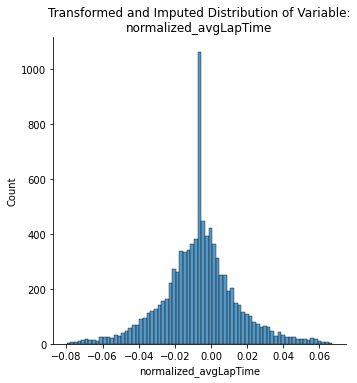

In [30]:
# Plot the new distribution of our new variable.
newnorm_minlaptime_dist = sns.displot(avglaps_avg, x = 'normalized_avgLapTime').set(title = "Transformed and Imputed Distribution of Variable:\nnormalized_avgLapTime")

We have a normalized feature with what appears to be a normal distribution! The one thing to worry about here is that there were so many outliers that had to be imputated, and that may cause a problem with our distribution.

### PRCP

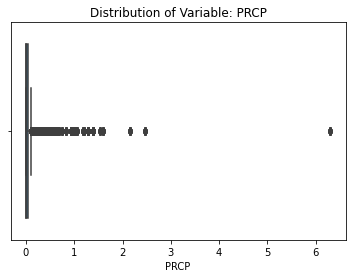

In [28]:
# Plot a boxplot to find our outliers.
PRCP_boxplt = sns.boxplot(data = features, x = 'PRCP').set(title = "Distribution of Variable: PRCP")

We have one significant outlier.

In [29]:
# What does PRCP look like?
features['PRCP'].describe()

count    9258.000000
mean        0.112807
std         0.392287
min         0.000000
25%         0.000000
50%         0.000000
75%         0.040000
max         6.300000
Name: PRCP, dtype: float64

The high max with low 75% quartile definitely suggests a positive skew.

In [30]:
"""
Transform PRCP with log(x + 1). This was suggested by the following site:
https://discuss.analyticsvidhya.com/t/methods-to-deal-with-zero-values-while-performing-log-transformation-of-variable/2431/9
"""
features['PRCP_trans'] = np.log(features['PRCP'] + 1)
features.describe()

,raceId,driverId,CompletionStatus,alt,grid,average_lap_time,minimum_lap_time,year,PRCP,TAVG,isHistoric,oneHot_circuits_1,oneHot_circuits_2,oneHot_circuits_3,oneHot_circuits_4,oneHot_circuits_5,oneHot_circuits_6,alt_trans,PRCP_trans
count,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000
mean,500.063945,248.870706,0.767768,199.431087,11.042774,97897.008632,90865.612119,2008.737308,0.112807,68.347119,0.296716,0.276302,0.244329,0.191294,0.131562,0.111255,0.045258,4.386664,0.078825
std,409.166748,355.492035,0.422279,307.146655,6.245172,21055.799600,13720.583129,7.242114,0.392287,8.901002,0.456835,0.447192,0.429712,0.393341,0.338032,0.314465,0.207881,1.497755,0.202175
min,1.000000,1.000000,0.000000,-7.000000,0.000000,62932.344828,55404.000000,1996.000000,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,15.000000,1.000000,10.000000,6.000000,85066.436479,80839.750000,2002.000000,0.000000,61.975000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.890372,0.000000
50%,236.000000,35.000000,1.000000,109.000000,11.000000,94647.636739,88988.500000,2009.000000,0.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.762174,0.000000
75%,934.000000,808.000000,1.000000,228.000000,16.000000,106184.579377,99523.750000,2015.000000,0.040000,75.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.463832,0.039221
max,1060.000000,854.000000,1.000000,2227.000000,24.000000,753493.000000,446036.000000,2021.000000,6.300000,94.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.711997,1.987874


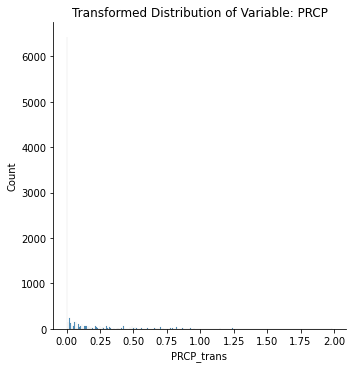

In [31]:
# Create a new variable distribution.
new2PRCP_dis = sns.displot(features, x = 'PRCP_trans').set(title = 'Transformed Distribution of Variable: PRCP')

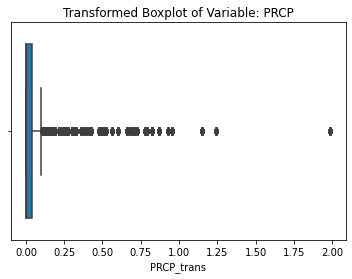

In [32]:
# Plot a boxplot to find our outliers.
PRCPtrans_boxplt = sns.boxplot(data = features, x = 'PRCP_trans').set(title = "Transformed Boxplot of Variable: PRCP")

Although there still seem to be some outliers, they aren't as extreme as before.

## Rejoin the Features into One Dataset

Current locations of our features:

- `alt` and `alt_trans` are both in the `features` dataset
- `minimum_lap_time` and `normalized_minLapTime` are both in the `avglaps_min` dataset
- `average_lap_time` and `normalized_avgLapTime` are both in the `avglaps_avg` dataset
- `PRCP` and `PRCP_trans` are both in `features` dataset

In [33]:
# What columns are in features?
features.columns

Index(['raceId', 'driverId', 'CompletionStatus', 'alt', 'grid', 'trackType',
       'average_lap_time', 'minimum_lap_time', 'year', 'PRCP', 'TAVG',
       'isHistoric', 'oneHot_circuits_1', 'oneHot_circuits_2',
       'oneHot_circuits_3', 'oneHot_circuits_4', 'oneHot_circuits_5',
       'oneHot_circuits_6', 'alt_trans', 'PRCP_trans'],
      dtype='object')

We need to bring normalized_minLapTime and normalized_avgLapTime over to features.

In [34]:
# What columns are in avglaps_min?
avglaps_min.columns

Index(['raceId', 'driverId', 'constructorId', 'grid', 'familyStatus',
       'CompletionStatus', 'year', 'circuitId', 'country', 'alt', 'isHistoric',
       'nationality', 'total_lap_time', 'average_lap_time', 'minimum_lap_time',
       'PRCP', 'TAVG', 'TMAX', 'TMIN', 'oneHot_circuits_1',
       'oneHot_circuits_2', 'oneHot_circuits_3', 'oneHot_circuits_4',
       'oneHot_circuits_5', 'oneHot_circuits_6', 'trackType2',
       'mean_minlaptime', 'normalized_minLapTime'],
      dtype='object')

In [35]:
# Select just the wanted features for a new dataset.
pref_minlapsdata = avglaps_min[["raceId", "driverId", "normalized_minLapTime"]]
pref_minlapsdata.describe()

,raceId,driverId,normalized_minLapTime
count,9258.000000,9258.000000,9258.000000
mean,500.063945,248.870706,0.995625
std,409.166748,355.492035,0.016515
min,1.000000,1.000000,0.941946
25%,120.000000,15.000000,0.986210
50%,236.000000,35.000000,0.995627
75%,934.000000,808.000000,1.004817
max,1060.000000,854.000000,1.049380


In [36]:
# What columns are in avglaps_avg?
avglaps_avg.columns

Index(['raceId', 'driverId', 'constructorId', 'grid', 'familyStatus',
       'CompletionStatus', 'year', 'circuitId', 'country', 'alt', 'isHistoric',
       'nationality', 'total_lap_time', 'average_lap_time', 'minimum_lap_time',
       'PRCP', 'TAVG', 'TMAX', 'TMIN', 'oneHot_circuits_1',
       'oneHot_circuits_2', 'oneHot_circuits_3', 'oneHot_circuits_4',
       'oneHot_circuits_5', 'oneHot_circuits_6', 'trackType2',
       'mean_avglaptime', 'normalized_avgLapTime'],
      dtype='object')

In [37]:
# Select just the wanted features for a new dataset.
pref_avglapsdata = avglaps_avg[["raceId", "driverId", "normalized_avgLapTime"]]
pref_avglapsdata.describe()

,raceId,driverId,normalized_avgLapTime
count,9258.000000,9258.000000,9258.000000
mean,500.063945,248.870706,-0.006469
std,409.166748,355.492035,0.020884
min,1.000000,1.000000,-0.079882
25%,120.000000,15.000000,-0.017398
50%,236.000000,35.000000,-0.005964
75%,934.000000,808.000000,0.003949
max,1060.000000,854.000000,0.067129


In [38]:
# Merge features with pref_minlapsdata by "raceId" and "driverId" to get min_features.
min_features = pd.merge(features, pref_minlapsdata, on = ["raceId", "driverId"])
min_features.head()

,raceId,driverId,CompletionStatus,alt,grid,trackType,average_lap_time,minimum_lap_time,year,PRCP,...,isHistoric,oneHot_circuits_1,oneHot_circuits_2,oneHot_circuits_3,oneHot_circuits_4,oneHot_circuits_5,oneHot_circuits_6,alt_trans,PRCP_trans,normalized_minLapTime
0,1,2,1,10,9,1,97635.672414,88283,2009,0.0,...,0,0,1,0,0,0,0,2.890372,0.0,0.994132
1,1,3,1,10,5,1,97612.172414,87706,2009,0.0,...,0,0,1,0,0,0,0,2.890372,0.0,0.987635
2,1,4,1,10,10,1,97597.637931,88712,2009,0.0,...,0,0,1,0,0,0,0,2.890372,0.0,0.998963
3,1,6,0,10,11,1,91822.235294,89923,2009,0.0,...,0,0,1,0,0,0,0,2.890372,0.0,1.012600
4,1,7,1,10,17,1,97622.103448,89823,2009,0.0,...,0,0,1,0,0,0,0,2.890372,0.0,1.011474


In [39]:
# Merge min_features with pref_avglapsdata by "raceId" and "driverId" to get final_features.
final_features = pd.merge(min_features, pref_avglapsdata, on = ["raceId", "driverId"])
final_features.head()

,raceId,driverId,CompletionStatus,alt,grid,trackType,average_lap_time,minimum_lap_time,year,PRCP,...,oneHot_circuits_1,oneHot_circuits_2,oneHot_circuits_3,oneHot_circuits_4,oneHot_circuits_5,oneHot_circuits_6,alt_trans,PRCP_trans,normalized_minLapTime,normalized_avgLapTime
0,1,2,1,10,9,1,97635.672414,88283,2009,0.0,...,0,1,0,0,0,0,2.890372,0.0,0.994132,0.002958
1,1,3,1,10,5,1,97612.172414,87706,2009,0.0,...,0,1,0,0,0,0,2.890372,0.0,0.987635,0.002717
2,1,4,1,10,10,1,97597.637931,88712,2009,0.0,...,0,1,0,0,0,0,2.890372,0.0,0.998963,0.002568
3,1,6,0,10,11,1,91822.235294,89923,2009,0.0,...,0,1,0,0,0,0,2.890372,0.0,1.012600,-0.058430
4,1,7,1,10,17,1,97622.103448,89823,2009,0.0,...,0,1,0,0,0,0,2.890372,0.0,1.011474,0.002819


### Create a csv file

In [40]:
# Use pandas.DataFrame.to_csv to read our final_features dataset into a new CSV file.
final_features.to_csv("./data/processed/final_features.csv", index = False)